The purpose of this Jupyter notebook is to visualize the average distances from bike stations to their Xth closest neighbors in Philly. The figure generated here correspond to the right side of Figure 4.

First we import the Python libraries that we need.

In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from math import cos, asin, sqrt
from matplotlib.ticker import MaxNLocator

%matplotlib inline

Read in Philly's bikeshare data

In [2]:
df_bike = pd.read_csv('../Data/philly_summer_bike_station_data.csv')

Helper functions:
- `distance(lat1, lon1, lat2, lon2)`: return the distance between two lat/long coordinates
- `get_closest(lst, threshold)`: get the average distances closest to a threshold

In [3]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

def get_closest(lst, threshold):
    largest_less = (-1, float("-inf"))
    smallest_greater = (-1, float("inf"))
    for i, val in enumerate(lst):
        if val < threshold and val > largest_less[1]:
            largest_less = (i, val)
        elif val > threshold and val < smallest_greater[1]:
            smallest_greater = (i, val)
        elif val == threshold:
            return (i, val), (i, val)
    return largest_less, smallest_greater

Plot average distance versus closest station, second closest station... to farthest station. For every station, get distances to all other stations and sort. Make a list of lists and convert to matrix and then find mean of each column.

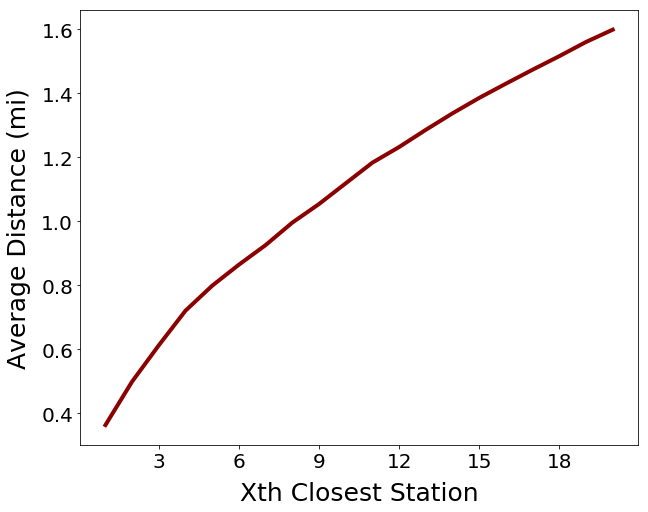

In [6]:
distance_matrix = []
indices = list(df_bike.index)
for index, row in df_bike.iterrows():
    temp_distances = []
    for other_index in indices:
        if other_index == index:
            continue
        lat1, lat2 = (df_bike.loc[index, 'station_lat'], df_bike.loc[other_index, 'station_lat'])
        long1, long2 = (df_bike.loc[index, 'station_long'], df_bike.loc[other_index, 'station_long'])
        temp_dist = distance(lat1, long1, lat2, long2)
        temp_distances.append(temp_dist)
    distance_matrix.append(sorted(temp_distances))
    
distance_matrix2 = np.array(distance_matrix)
averages = np.mean(distance_matrix2, axis=0)

averages_miles = averages*0.621371
plt.figure(figsize=(10, 8))
plt.plot(list(range(1, 21)), averages[:20], linewidth=4, color='darkred')
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Xth Closest Station', fontsize=25, labelpad=10)
plt.ylabel('Average Distance (mi)', fontsize=25, labelpad=10)
plt.show()

Find the average distance close to 0.5 and 1 mile.

In [5]:
print(get_closest(averages_miles, 0.5))
print(get_closest(averages_miles, 1))

((4, 0.49649969762033286), (5, 0.5372864834170658))
((19, 0.9936586684202396), (20, 1.0228171155326564))
